# CHAPTER 8-9

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
#import scipy.stats as ttest_1samp

In [3]:
data = pd.read_csv('books.csv', delimiter = ',')

In [4]:
#rename just for convenience
data.rename({'average_rating' : 'avr_rate',
             '# num_pages' : 'num_pages',
             'ratings_count' : 'ratings',
             'language_code' : 'language',
             'text_reviews_count' : 'text_reviews'}, axis = 'columns', inplace = 'True')

In [5]:
data.head()

,bookID,title,authors,avr_rate,isbn,isbn13,language,num_pages,ratings,text_reviews
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249.0
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613.0
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390.0
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272.0
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964.0


In [6]:
summary = sum(data['num_pages'])
total = len(data['num_pages'])
for i in range(total):
    if (data['num_pages'][i] == 0):
        data['num_pages'][i] = summary/total

D:\3 course\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [7]:
data = data.drop([10666])

In [8]:
data.sample(7)

,bookID,title,authors,avr_rate,isbn,isbn13,language,num_pages,ratings,text_reviews
4468,13519,The Journey to the East,Hermann Hesse-Hilda Rosner,3.70,0312421680,9780312421687,eng,128,7716,351.0
3114,9653,If on a Winter's Night a Traveler,Italo Calvino-William Weaver-Peter Washington,4.06,0679420258,9780679420255,eng,254,1412,176.0
4530,13616,Death Note Vol. 4: Love (Death Note #4),Tsugumi Ohba-Tsugumi Ohba-Alexis Kirsch,4.39,142150331X,9781421503318,eng,204,20286,635.0
3012,9427,The Story of Chicago May,Nuala O'Faolain,3.23,1573223204,9781573223201,en-US,307,337,60.0
139,285,Love Letters,Kahlil Gibran-Suheil Bushrui-Salma H. Al-Kuzbari,3.67,1851681825,9781851681822,eng,178,201,9.0
3972,12113,Six Characters in Search of an Author and Othe...,Luigi Pirandello-Mark Musa,3.95,014018922X,9780140189223,eng,224,2888,63.0
12461,42797,Goodbye Forever (Sweet Dreams #72),Barbara Conklin,3.72,055324356X,9780553243567,eng,135,54,0.0


In [9]:
data.describe()

,bookID,avr_rate,num_pages,ratings,text_reviews
count,13718.000000,13718.000000,13718.000000,1.371800e+04,13718.000000
mean,22159.651407,3.930551,344.521213,1.776039e+04,533.478787
std,13699.671611,0.357875,251.164675,1.129411e+05,2528.653867
min,1.000000,0.000000,1.000000,0.000000e+00,0.000000
25%,10620.500000,3.770000,199.000000,8.300000e+01,7.000000
50%,21321.500000,3.960000,304.000000,6.300000e+02,40.000000
75%,33311.750000,4.130000,421.000000,4.738500e+03,222.000000
max,47709.000000,5.000000,6576.000000,5.629932e+06,93619.000000


In [28]:
data.columns

Index(['bookID', 'title', 'authors', 'avr_rate', 'isbn', 'isbn13', 'language',
       'num_pages', 'ratings', 'text_reviews'],
      dtype='object')

In [10]:
%matplotlib inline

# The estimation game

###### Root mean squared error is one of several ways to summarize the average error of an estimation process.

In [11]:
def RMSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float RMSE
    """
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

##### The following function simulates experiments where we try to estimate the mean of a population based on a sample with size n=7. We run iters=1000 experiments and collect the mean and median of each sample.

In [12]:
import random

def Estimate1(n=7, iters=1000):
    """Evaluates RMSE of sample mean and median as estimators.

    n: sample size
    iters: number of iterations
    """
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Experiment 1')
    print('rmse xbar', RMSE(means, mu))
    print('rmse median', RMSE(medians, mu))
    
Estimate1()

Experiment 1
rmse xbar 0.37379107040888704
rmse median 0.44586143044171983


##### Using x' to estimate the mean works a little better than using the median; in the long run, it minimizes RMSE. But using the median is more robust in the presence of outliers or large errors.

# Estimating variance

##### The obvious way to estimate the variance of a population is to compute the variance of the sample, S^2, but that turns out to be a biased estimator; that is, in the long run, the average error doesn't converge to 0.

##### The following function computes the mean error for a collection of estimates.

In [13]:
def MeanError(estimates, actual):
    """Computes the mean error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float mean error
    """
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

##### The following function simulates experiments where we try to estimate the variance of a population based on a sample with size n=7. We run iters=1000 experiments and two estimates for each sample, S^2 and S{n-1}^2.

In [14]:
def Estimate2(n=7, iters=1000):
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('mean error biased', MeanError(estimates1, sigma**2))
    print('mean error unbiased', MeanError(estimates2, sigma**2))
    
Estimate2()

mean error biased -0.13582258200987968
mean error unbiased 0.008206987655140392


##### The mean error for S^2 is non-zero, which suggests that it is biased. The mean error for S{n-1}^2 is close to zero, and gets even smaller if we increase iters.

# The sampling distribution

##### The following function simulates experiments where we estimate the mean of a population using x', and returns a list of estimates, one from each experiment.

In [15]:
def SimulateSample(mu=90, sigma=7.5, n=9, iters=1000):
    xbars = list(data['num_pages'])
    for j in range(iters):
        xs = np.random.normal(mu, sigma, n)
        xbar = np.mean(xs)
        xbars.append(xbar)
    return xbars

xbars = SimulateSample()

##### Here's the "sampling distribution of the mean" which shows how much we should expect x' to vary from one experiment to the next.

D:\3 course\anaconda\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


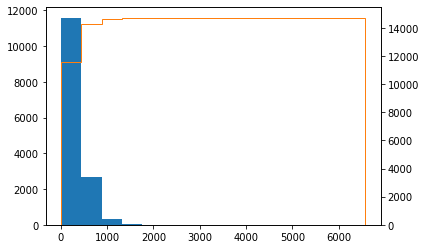

In [16]:
# Plot the histogram and CDF
fig, ax = plt.subplots()
ax2 = ax.twinx()
n, bins, patches = ax.hist(xbars, bins=15, normed=False)
n, bins, patches = ax2.hist(
    xbars, cumulative=1, histtype='step', bins=15, color='tab:orange')

##### The mean of the sample means is close to the actual value of mu.

In [17]:
np.mean(xbars)

327.22891960366053

##### And the RMSE of the sample means is called the standard error.

In [18]:
stderr = RMSE(xbars, 90)
stderr

345.21478753492676

In [19]:
def Estimate1(n=7, iters=100000):
    """Mean error for xbar and median as estimators of population mean.

    n: sample size
    iters: number of iterations
    """
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Experiment 1')
    print('mean error xbar', MeanError(means, mu))
    print('mean error median', MeanError(medians, mu))
    
Estimate1()

Experiment 1
mean error xbar -0.00010307152286790483
mean error median -0.00021276121821957


In [20]:
def Estimate2(n=7, iters=100000):
    """RMSE for biased and unbiased estimators of population variance.

    n: sample size
    iters: number of iterations
    """
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('Experiment 2')
    print('RMSE biased', RMSE(estimates1, sigma**2))
    print('RMSE unbiased', RMSE(estimates2, sigma**2))

Estimate2()

Experiment 2
RMSE biased 0.5156364257385069
RMSE unbiased 0.5787501637840896


In [21]:
def SimulateGame(lam):
    """Simulates a game and returns the estimated goal-scoring rate.

    lam: actual goal scoring rate in goals per game
    """
    goals = 0
    t = 0
    while True:
        time_between_goals = random.expovariate(lam)
        t += time_between_goals
        if t > 1:
            break
        goals += 1

    # estimated goal-scoring rate is the actual number of goals scored
    L = goals
    return L

In [22]:
# The following function simulates many games, then uses the
# number of goals scored as an estimate of the true long-term
# goal-scoring rate.

def Estimate(lam=2, m=1000000):

    estimates = list(data['num_pages'])
    for i in range(m):
        L = SimulateGame(lam)
        estimates.append(L)

    print('Experiment 3')
    print('rmse L', RMSE(estimates, lam))
    print('mean error L', MeanError(estimates, lam))
    
    #plotting pmf for column "text_reviews"
    x2 = estimates
    y2 = np.arange(1, len(x2) +1 ) / len(x2)
    plt2 = plt.plot(x2, y2, marker = '.', linestyle = 'none')

Experiment 3
rmse L 49.4288244473013
mean error L 4.636136479770508


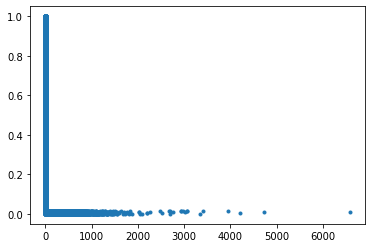

In [23]:
Estimate()

# Smth looks like Hypothesis Testing (no)

##### 1) Choosing a test statistics
##### 2) Define a null hypothesis
##### 3) Compure a p-value
##### 4) Interpret result (statistically significant)
Firstly, I tryied to identify the parameters which can be suitable
It's gonna be relation ship between average rating with text reviews and ratings
Then I identified my hypothesis.
After that, calculate p-value and make conclusion.
#####  H: text reviews and ratings depend on average rating. If the last one is high, соответственно, those 2 are high as well
##### H0: ratings and amount of text reviews are the same в зависимости от средней оценки
##### H1: ratings and amount of text reviews are not the same в зависимости от средней оценки

In [24]:
import seaborn as sns

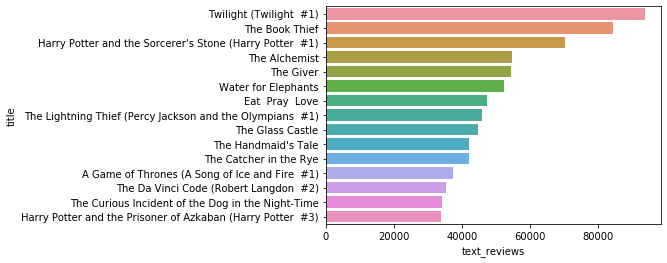

In [67]:
# highest reviewed books
highest_reviews = data.nlargest(15, ['text_reviews'])
sns.barplot(highest_reviews['text_reviews'], highest_reviews['title'])

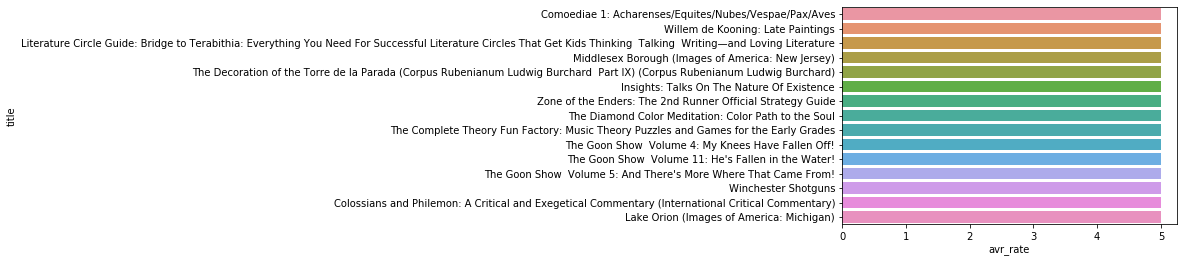

In [69]:
# highest average ratings of books
highest_reviews = data.nlargest(15, ['avr_rate'])
sns.barplot(highest_reviews['avr_rate'], highest_reviews['title'])

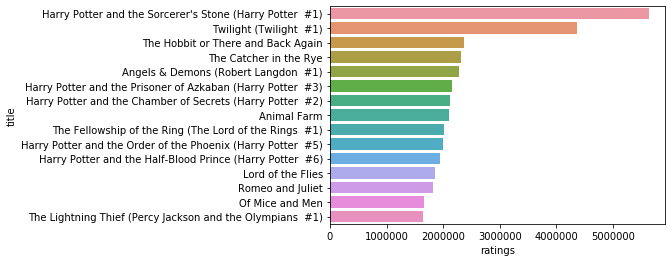

In [70]:
# highest ratings of books
highest_reviews = data.nlargest(15, ['ratings'])
sns.barplot(highest_reviews['ratings'], highest_reviews['title'])

#### Relationship between Rating and Text Reviews

<Figure size 1080x720 with 0 Axes>

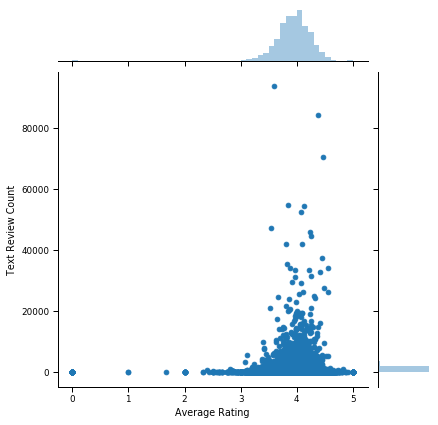

In [122]:
plt.figure(figsize=(15,10))
data.dropna(0, inplace=True)
sns.set_context('paper')
ax =sns.jointplot(x='avr_rate',y='text_reviews', kind='scatter',  data= data[['text_reviews', 'avr_rate']])
ax.set_axis_labels('Average Rating', 'Text Review Count')
plt.show()

<Figure size 1080x720 with 0 Axes>

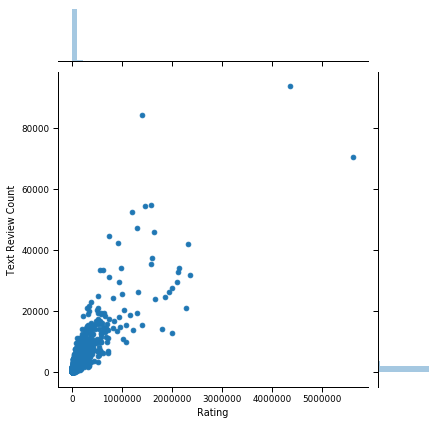

In [126]:
plt.figure(figsize=(15,10))
data.dropna(0, inplace=True)
sns.set_context('paper')
ax =sns.jointplot(x='ratings',y='text_reviews', kind='scatter',  data= data[['text_reviews', 'ratings']])
ax.set_axis_labels('Rating', 'Text Review Count')
plt.show()

<Figure size 1080x720 with 0 Axes>

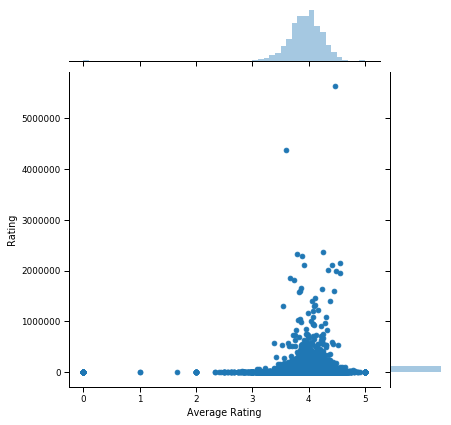

In [129]:
plt.figure(figsize=(15,10))
data.dropna(0, inplace=True)
sns.set_context('paper')
ax =sns.jointplot(x='avr_rate',y='ratings', kind='scatter',  data= data[['ratings','avr_rate']])
ax.set_axis_labels('Average Rating', 'Rating')
plt.show()

##### as we can see the most occured rates around 3 and 4

In [83]:
req = data.groupby(pd.cut(data['avr_rate'], [0,1,2,3,4,5]))
req = req[['ratings']]
req.sum().reset_index()

,avr_rate,ratings
0,"(0, 1]",3
1,"(1, 2]",13
2,"(2, 3]",66474
3,"(3, 4]",115040722
4,"(4, 5]",128529761


In [81]:
req1 = data.groupby(pd.cut(data['avr_rate'], [0,1,2,3,4,5]))
req1 = req1[['text_reviews']]
req1.sum().reset_index()

,avr_rate,text_reviews
0,"(0, 1]",0.0
1,"(1, 2]",4.0
2,"(2, 3]",5041.0
3,"(3, 4]",3660397.0
4,"(4, 5]",3652819.0


##### here

In [25]:
for i in range(6):
    print('Mean value of text reviews with average rating ', i, ' is ', data[data['avr_rate'] == i]['text_reviews'].mean())

Mean value of text reviews with average rating  0  is  0.029411764705882353
Mean value of text reviews with average rating  1  is  0.0
Mean value of text reviews with average rating  2  is  0.2
Mean value of text reviews with average rating  3  is  0.7692307692307693
Mean value of text reviews with average rating  4  is  289.8007662835249
Mean value of text reviews with average rating  5  is  0.25


In [89]:
for i in range(6):
    print('Mean value of ratings with average rating ', i, ' is ', data[data['avr_rate'] == i]['ratings'].mean())

Mean value of ratings with average rating  0  is  0.0
Mean value of ratings with average rating  1  is  1.5
Mean value of ratings with average rating  2  is  1.0
Mean value of ratings with average rating  3  is  4.5
Mean value of ratings with average rating  4  is  10635.318007662836
Mean value of ratings with average rating  5  is  1.7142857142857142


##### and here

##### Average rating distribution

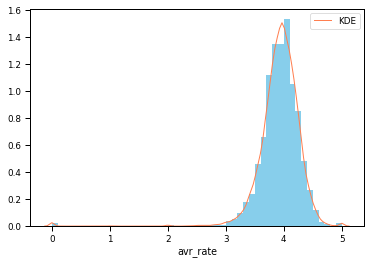

In [130]:
sns.distplot(data['avr_rate'], 
             kde_kws={"color": "coral", "lw": 1, "label": "KDE"}, 
             hist_kws={"histtype": "stepfilled", "linewidth": 1, "alpha": 1, "color": "skyblue"});

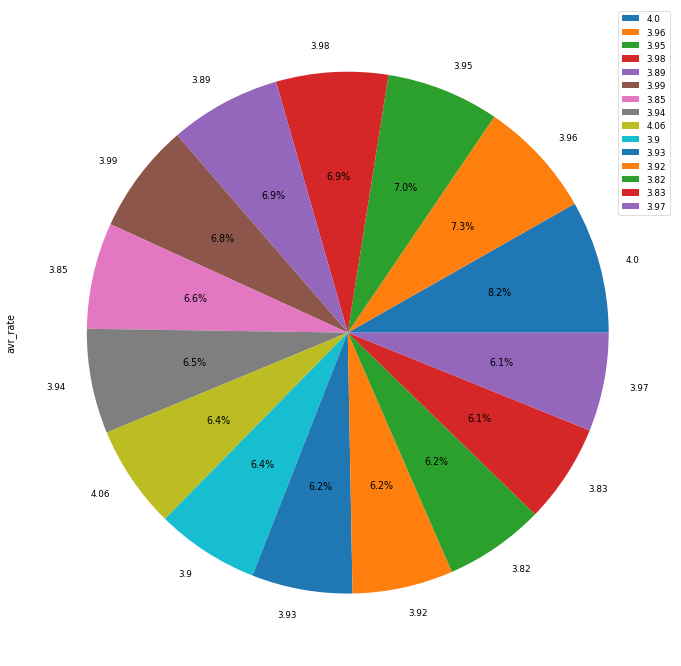

In [131]:
# top average ratings
data['avr_rate'].value_counts().head(15).plot(kind = 'pie', autopct='%1.1f%%', figsize=(12, 12)).legend()

In [26]:
from scipy.stats import ttest_1samp

scipy.stats.ttest_1samp() tests if the population mean of data is likely to be equal to a given value (technically if observations are drawn from a Gaussian distributions of given population mean). It returns the T statistic, and the p-value :

##### 1 sample testing the value of a population mean

In [27]:
#for reviewed books
sp.stats.ttest_1samp(data['text_reviews'], 0)

Ttest_1sampResult(statistic=24.710024103750065, pvalue=6.267185633026452e-132)

In [28]:
#for rated books
sp.stats.ttest_1samp(data['ratings'], 0)

Ttest_1sampResult(statistic=18.41813449827622, pvalue=7.489864148883935e-75)

In [29]:
#for average rated books
sp.stats.ttest_1samp(data['avr_rate'], 0)

Ttest_1sampResult(statistic=1286.3757464047642, pvalue=0.0)

##### I don't have any columns with just to parameter characteristics of data, that's why divided it by myself

In [30]:
data['avr_rate'] = data['avr_rate'].apply(lambda x: round(x,0))

In [31]:
data.sample(6)

,bookID,title,authors,avr_rate,isbn,isbn13,language,num_pages,ratings,text_reviews
9662,31157,The Rising: Antichrist is Born (Before They W...,Tim LaHaye-Jerry B. Jenkins,4.0,0842361936,9780842361934,eng,400,14261,187.0
7706,24121,Mayflower Treasure Hunt (A to Z Mysteries: Sup...,Ron Roy-John Steven Gurney,4.0,0375839372,9780375839375,en-US,114,926,37.0
6386,19099,Silas Marner,George Eliot,4.0,1591940486,9781591940487,eng,279,164,6.0
7795,24414,The Circle (Dan Lenson #3),David Poyer,4.0,0312929641,9780312929640,en-US,543,337,7.0
7914,24784,The Black Cauldron (The Chronicles of Prydain ...,Lloyd Alexander,4.0,080508049X,9780805080490,eng,182,51994,1122.0
11342,37911,Shipwreck (Island I),Gordon Korman-Holter Graham,4.0,0439023319,9780439023313,eng,342,102,14.0


So, for now I have 5 groups which will represent the correlation between text reviews, rating and average rating

In [32]:
groupby_avr = data.groupby('avr_rate')

In [33]:
for rate, value in groupby_avr['text_reviews']:
    print(rate,'-----', value.mean())

0.0 ----- 0.029411764705882353
1.0 ----- 0.0
2.0 ----- 29.2
3.0 ----- 223.23509174311926
4.0 ----- 560.5597353949152
5.0 ----- 369.0246913580247


In [34]:
groupby_avr.mean()

,bookID,num_pages,ratings,text_reviews
avr_rate,,,,
0.0,28622.911765,200.147059,0.000000,0.029412
1.0,24865.500000,71.000000,1.500000,0.000000
2.0,23538.600000,245.500000,270.000000,29.200000
3.0,22842.025229,271.933486,4398.354358,223.235092
4.0,22088.878776,347.182673,18661.636327,560.559735
5.0,22325.135802,498.181070,23245.489712,369.024691


Difference in means

In [46]:
def TestStatistic(data):
    group1, group2, group3, group4, group5 = data
    test_stat = abs(group1.mean() - group2.mean() - group3.mean() - group4.mean() - group5.mean())
    return test_stat

In [60]:
groupby_avr['ratings'].mean()

avr_rate
0.0        0.000000
1.0        1.500000
2.0      270.000000
3.0     4398.354358
4.0    18661.636327
5.0    23245.489712
Name: ratings, dtype: float64

In [58]:
for i in groupby_avr['ratings'].mean():
    res = i - (i+1)
res

-1.0

Difference in standart deviations

In [51]:
def TestStatistic1(data):
    group1, group2, group3, group4, group5 = data
    test_stat = abs(group1.std() - group2.std() - group3.std() - group4.std() - group5.std())
    return test_stat 

In [61]:
groupby_avr['ratings'].std()

avr_rate
0.0         0.000000
1.0         0.707107
2.0      1198.533270
3.0     25188.564120
4.0    114898.243000
5.0    188505.205959
Name: ratings, dtype: float64

In [59]:
for i in groupby_avr['ratings'].std():
    res = i - (i+1)
res

-1.0

In [62]:
groupby_avr['text_reviews'].mean()

avr_rate
0.0      0.029412
1.0      0.000000
2.0     29.200000
3.0    223.235092
4.0    560.559735
5.0    369.024691
Name: text_reviews, dtype: float64

In [65]:
for i in groupby_avr['text_reviews'].mean():
    res = i - (i+1)
res

-1.0

In [63]:
groupby_avr['text_reviews'].std()

avr_rate
0.0       0.171499
1.0       0.000000
2.0     128.705539
3.0     748.168661
4.0    2606.369575
5.0    2785.607247
Name: text_reviews, dtype: float64

In [66]:
for i in groupby_avr['text_reviews'].std():
    res = i - (i+1)
res

-1.0

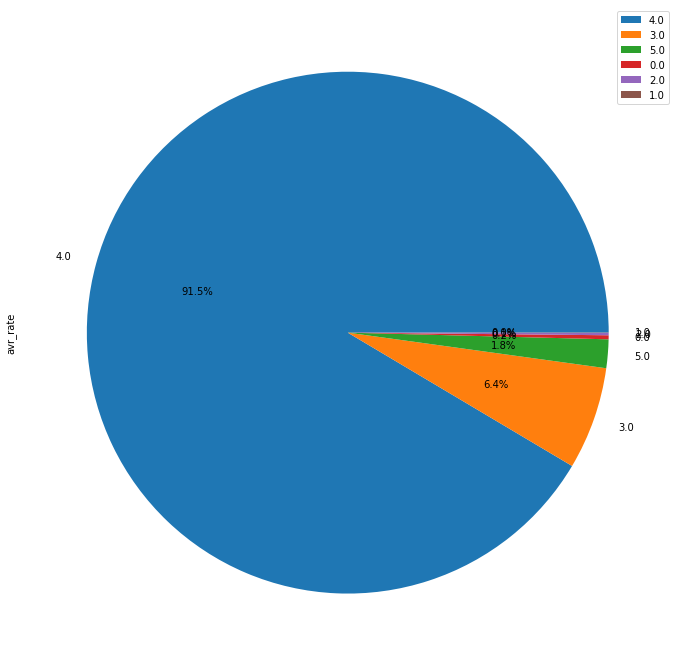

In [38]:
data['avr_rate'].value_counts().head(15).plot(kind = 'pie', autopct='%1.1f%%', figsize=(12, 12)).legend()

##### Paired testing: repeated measurements on the same individuals

0.0         AxesSubplot(0.1,0.679412;0.363636x0.220588)
1.0    AxesSubplot(0.536364,0.679412;0.363636x0.220588)
2.0         AxesSubplot(0.1,0.414706;0.363636x0.220588)
3.0    AxesSubplot(0.536364,0.414706;0.363636x0.220588)
4.0             AxesSubplot(0.1,0.15;0.363636x0.220588)
5.0        AxesSubplot(0.536364,0.15;0.363636x0.220588)
dtype: object

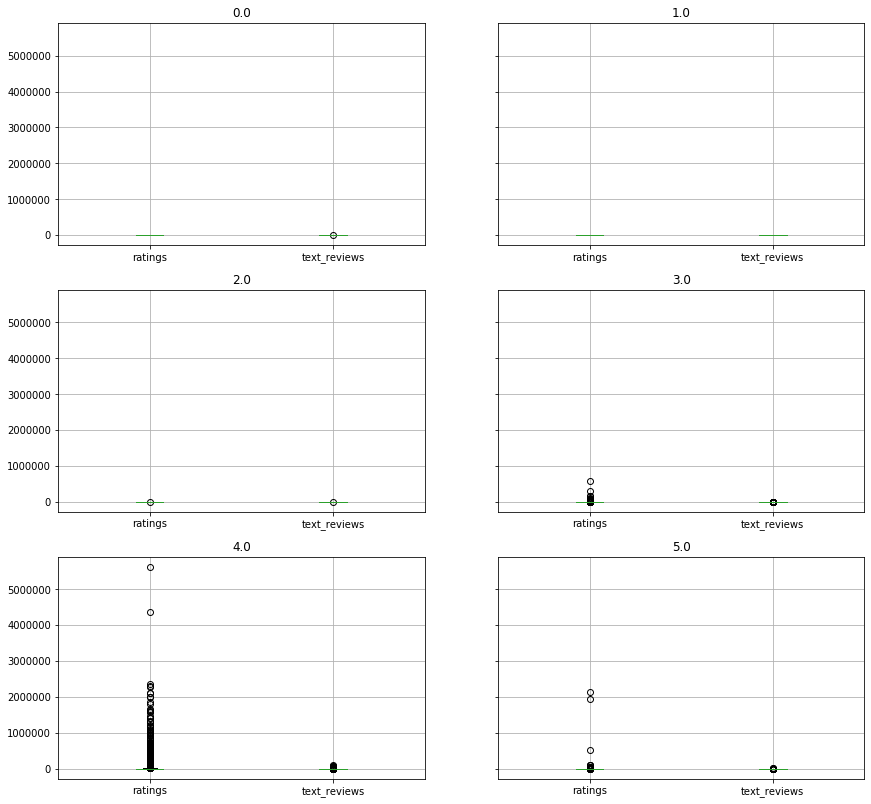

In [36]:
groupby_avr.boxplot(column=['ratings','text_reviews'], figsize=(14,14))

##### 2 sample testing for difference across populations

In [25]:
four_rate = data[data['avr_rate'] == 4]['ratings']
five_rate = data[data['avr_rate'] == 5]['ratings']

In [30]:
#sp.stats.ttest_ind(zero_rate, one_rate, two_rate, three_rate, four_rate, five_rate)
sp.stats.ttest_ind(four_rate, five_rate)

Ttest_indResult(statistic=-0.6063349127583074, pvalue=0.5443031423039171)

In [74]:
four_rate = data[data['avr_rate'] == 4]['text_reviews']
five_rate = data[data['avr_rate'] == 5]['text_reviews']

In [75]:
sp.stats.ttest_ind(four_rate, five_rate)

Ttest_indResult(statistic=1.133094755461505, pvalue=0.2571957065597944)

#### Testing correlation

In [71]:
from scipy.stats import pearsonr

In [72]:
from scipy.stats import spearmanr

In [81]:
data.cov()

,bookID,avr_rate,num_pages,ratings,text_reviews
bookID,1.876810e+08,-109.733448,-44079.844759,-1.256795e+08,-3.036721e+06
avr_rate,-1.097334e+02,0.124594,9.176402,1.181465e+03,2.380195e+01
num_pages,-4.407984e+04,9.176402,63083.694199,7.740119e+05,2.073784e+04
ratings,-1.256795e+08,1181.464819,774011.925437,1.275570e+10,2.465970e+08
text_reviews,-3.036721e+06,23.801946,20737.843601,2.465970e+08,6.394090e+06


In [78]:
data.corr()

,bookID,avr_rate,num_pages,ratings,text_reviews
bookID,1.000000,-0.022692,-0.012811,-0.081227,-0.087661
avr_rate,-0.022692,1.000000,0.103506,0.029636,0.026667
num_pages,-0.012811,0.103506,1.000000,0.027286,0.032652
ratings,-0.081227,0.029636,0.027286,1.000000,0.863468
text_reviews,-0.087661,0.026667,0.032652,0.863468,1.000000


## Conclusion:
pvalue in all tests is more than 5%. That's why I can think that my Null Hypothesis is true and in my dataset there is no defference between number of ratings or text reviews and average rating of book.

but it's not truth